# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [12]:
print(df.shape)
df.head()

(10886, 19)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [ ]:
Даних 10886 рядків та 19 колонок так як попередньо ми додали додаткові колонки для аналізу. В кожному рядку кількість арендованих велосипедів за годину.

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


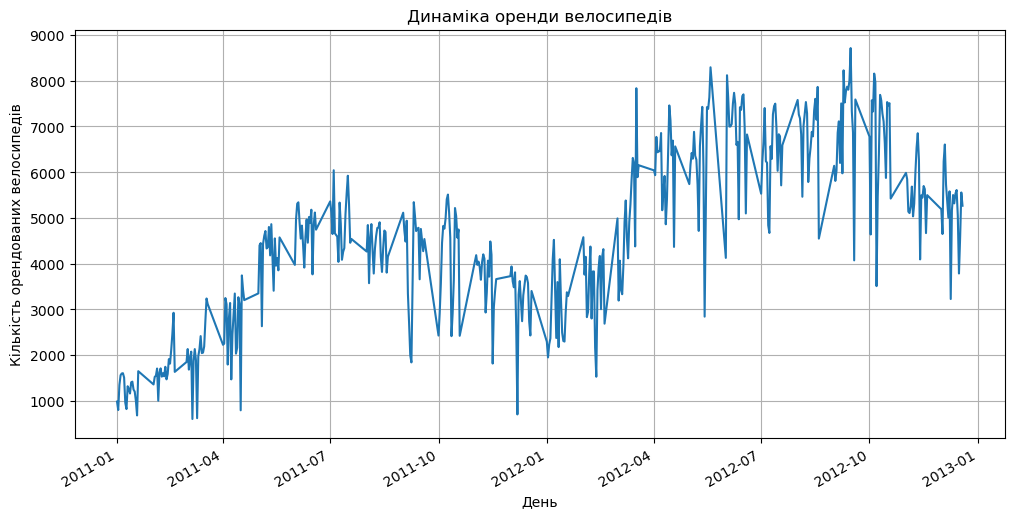

In [44]:
day_counts=df['count'].resample('D').sum()
day_counts=day_counts[day_counts.index.day<20]
day_counts.plot(
    figsize=(12,6),
    title="Динаміка оренди велосипедів",
    xlabel='День',
    ylabel='Кількість орендованих велосипедів',
    grid=True
);

In [ ]:
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?

Маємо дуже велику кількість днів і через це є заломи, для того щоб їх прибрати потрібно збільшити одиницю часу наприклад 
будувати графік не за днями, а за місяцями або сезонами.

2. Які загальні тенденції ви бачите на графіку?

В цілому є тенденція росту. Тобто кількість орендованих велосипедів за день з часом збільшується.
    
3. Чи помітні якісь сезонні коливання?

Так сезонні коливання є досить помітними. Видно, що кількість орендованих велосипедів за день зменшується взимку і навпаки підвищується ближче до літа.

4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?

Так, іноді є періоди з аномально низькими значеннями. На мою думку, це може бути через непіходящі погодні умови.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

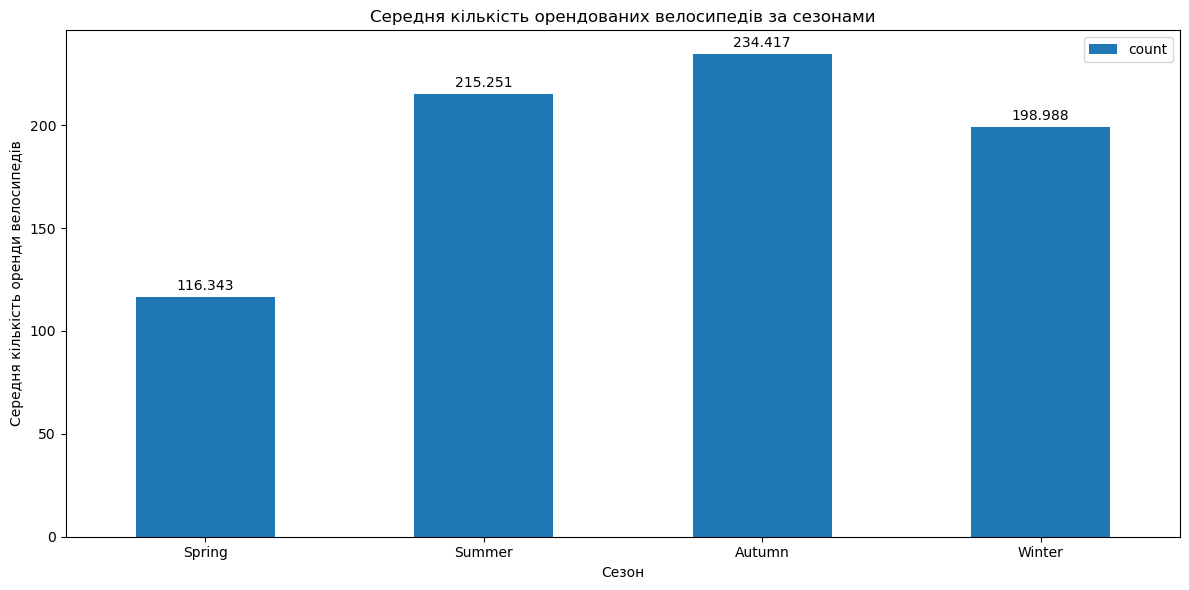

In [42]:
season_mean=df[['season','count']].groupby(['season']).mean()
ax=season_mean.plot.bar(
    figsize=(12,6),
    title="Середня кількість орендованих велосипедів за сезонами",
    xlabel='Сезон',
    ylabel='Середня кількість оренди велосипедів'
)

ax.set_xticklabels(['Spring', 'Summer', 'Autumn', 'Winter'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.xticks(rotation=360)
plt.tight_layout()

In [ ]:
1. В який сезон найбільша середня кількість оренди велосипедів?

Найбільша середня кількість оренди велосипедів спостерігається восени.

2. Як ви можете пояснити таку сезонну закономірність?

Скоріше за все така сезонна закономірність пояснюється погодними умовами, температурою повітря.

3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

Середня кількість оренди велосипедів між найпопулярнішим та найменш популярним сезоном відзізняється в два рази.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


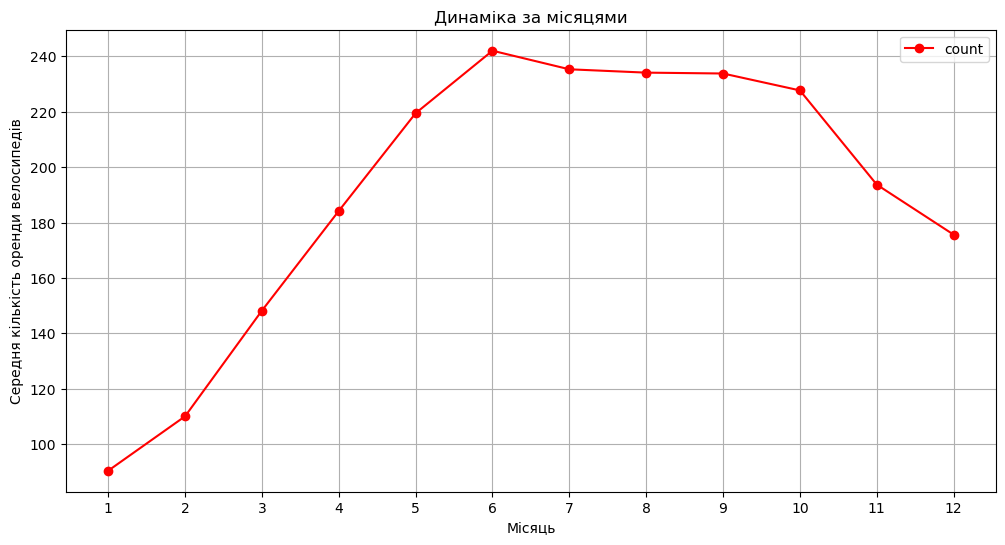

In [50]:
monthly_mean=df[['month','count']].groupby(['month']).mean()
ax=monthly_mean.plot(
    kind='line',
    marker='o',
    color='red',
    figsize=(12, 6),
    title='Динаміка за місяцями',
    xlabel='Місяць',
    ylabel='Cередня кількість оренди велосипедів',
    grid=True
)
ax.set_xticks(range(1,13));

In [ ]:
1. В які місяці спостерігається пік та спад оренди?

Пік оренди спостерігається з травня по жовтень. В інші місяці спостерігається спад.

2. Чи збігається ця закономірність з результатами з попереднього завдання?

В цілому загальна тенденція зберігається, але при аналізі помісячно виходить, що пік оренди влітку, а при аналізі посезонно пік припадає на осінь.

3. Як може вплинути клімат на оренду велосипедів протягом року?

На мою думку, клімат має найбільший вплив на кількість оренди велосипедів. Бо велосипедні прогулянки більш приємні і безпечні при комфортній літньо-осінній температурі. 

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

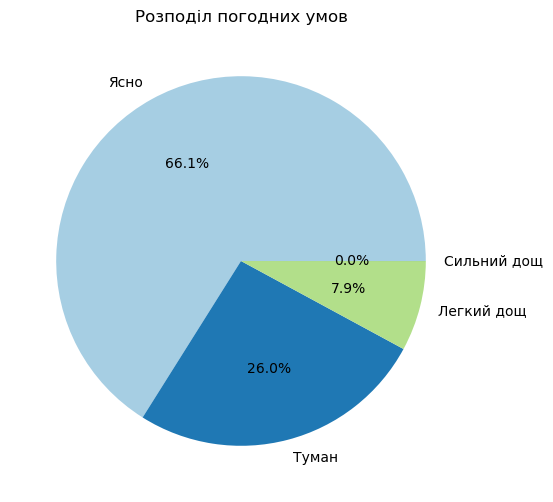

In [68]:
weather_part=df.groupby(['weather'])['weather'].count()
weather_part.plot.pie(
    figsize=(12,6),
    autopct='%1.1f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Розподіл погодних умов',
    ylabel='',
    colors=plt.cm.Paired.colors
);



In [ ]:
1. Яка погода переважає в датасеті?

В датасеті переважає ясна погода.

2. Чи є дні із сильним дощем? Яка їх частка?

В датасеті є всього один день з сильним дощем, його частка від загальної кількості 0%.

3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Чим ясніша і краща погода тим більший попит на оренду і навпаки чим холодніша і мокріша погода тим попит менше.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

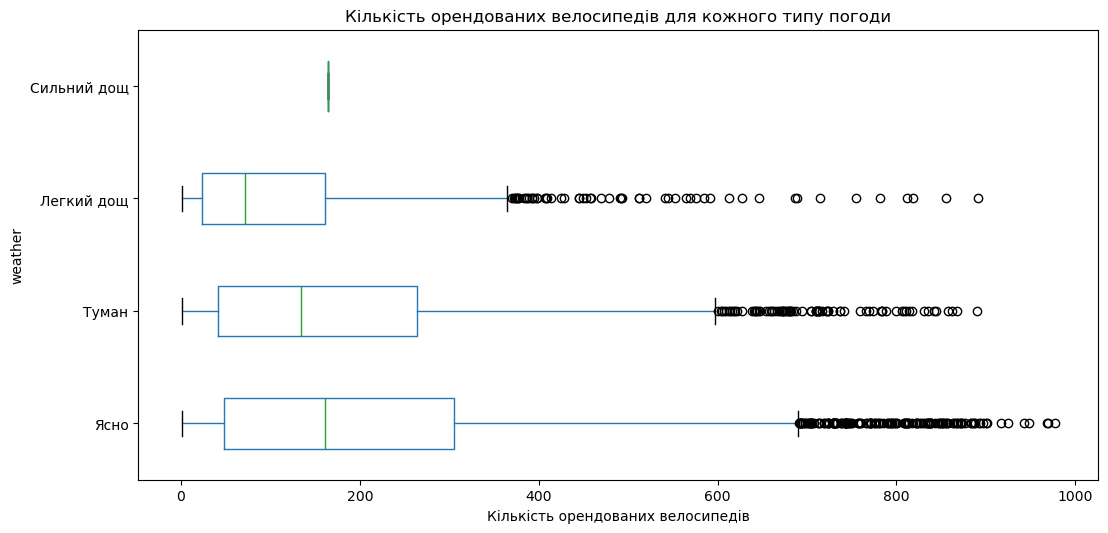

In [82]:
df.boxplot(
    column='count',
    by='weather',
    figsize=(12, 6),
    vert=False,
    grid = False
)
plt.yticks(
    ticks=[1, 2, 3, 4], 
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
)
plt.title('Кількість орендованих велосипедів для кожного типу погоди')
plt.suptitle('') 
plt.xlabel('Кількість орендованих велосипедів')
plt.show()

In [ ]:
1. При якій погоді найбільший розкид у кількості оренди?

При ясній погоді найбільший розкид у кількості оренди.

2. Чи є викиди (outliers) в даних? При якій погоді?

Так, в даних є викиди особливо при ясній погоді, але також спостерігаються при тумані та легкому дощі.

3. При якій погоді медіанне значення оренди найвище?

 Медіанне значення оренди найвище при ясній погоді.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

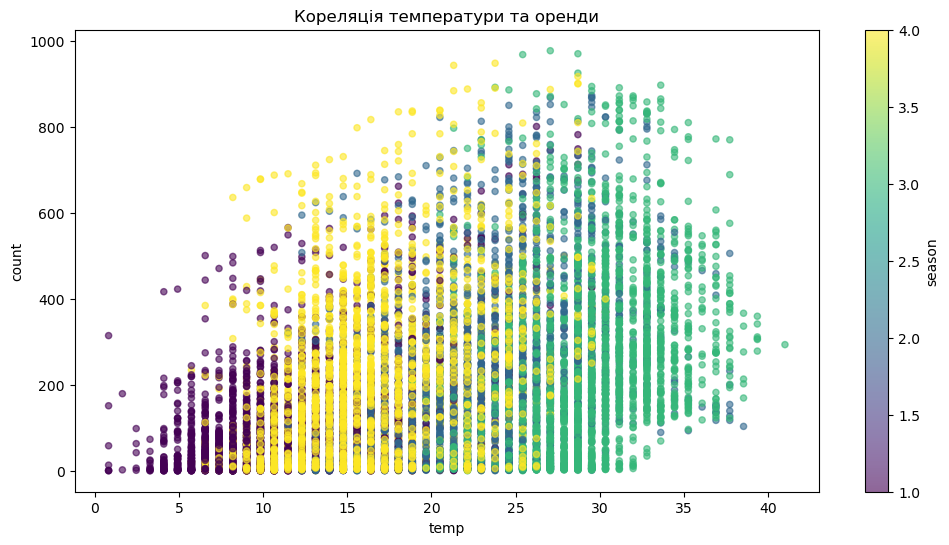

In [83]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Кореляція температури та оренди',
    figsize=(12, 6),
    alpha=0.6
)
plt.show()

In [ ]:
Чи є зв'язок між температурою та кількістю оренди? Який?

Так, чим вища температура тим більша кількість оренд.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

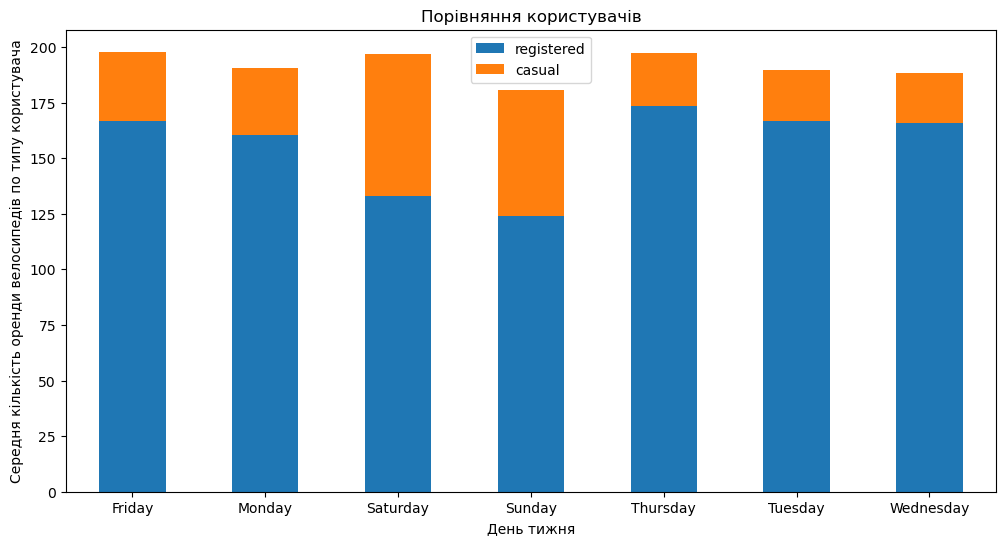

In [92]:
weekday_mean=df[['weekday','registered','casual' ]].groupby(['weekday']).mean()
weekday_mean.plot.bar(
    stacked=True,
    figsize=(12,6),
    title="Порівняння користувачів",
    xlabel='День тижня',
    ylabel='Середня кількість оренди велосипедів по типу користувача'
)
plt.xticks(rotation=360);

In [ ]:
1. В які дні тижня більше оренд від зареєстрованих користувачів?

В усі дні кількість оренд від зареєстрованих користувачів більше ніж від випадкових. Але в суботу та неділю трохи нижче ніж в будні. 

2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

У вихідні дні спостерігається досить велика кількість випадкових людей. Через те що люди у вихідні більш схильні до якогось незапланованого дозвілля.